Tarea 1 Programación AVanzada:
Bastián Matteo Moya

Respuestas:
1. ¿Qué es un paradigma de programación?

Un paradigma de programación es un enfoque o técnica que define cómo se estructura y organiza un código para resolver problemas en programación. 
Los paradigmas incluyen reglas y estilos que determinan cómo se construyen los programas y cómo interactúan sus componentes. Un ejemplo icónico 
es la programación orientada a objetos.

2. ¿En qué se basa la programación orientada a objetos?

La programación orientada a objetos es un paradigma de programación que basa en el uso de clases para generar objetos, los cuales poseen atributos (características) y también métodos (acciones que pueden realizar). Esto concpeto abarca los principios de herencia, polimorfismo, abstracción, entre otros.

3. ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación
big 𝑂?

La iteración es un método para resolver problemas en programación que hace uso de estructuras de control como los bucles for o while. Estos bucles permiten repetir un conjunto de instrucciones hasta que se cumple una condición específica.

En cambio, la recursividad consiste en la reutilización de una función dentro de su propia definición, es decir, la función se llama a sí misma para resolver el problema dividiéndolo en problemas más pequeños.

En cuanto a la relación con la notación Big-O, en la iteratividad, la complejidad temporal depende del número de veces que un bucle (for o while) se ejecuta. Un blucle que se ejecuta n veces, tiene una complejidad O(n). En la recursividad, la complejidad temporal depende del número de llamadas recursivas y el tipo de trabajo a realizar en cada llamada. Por ejemplo, una función recursiva que se divide en dos subproblemas tiene una complejidad O(2^n) en casos exponenciales.

La elección entre iteración y recursividad depende de la naturaleza del problema y de su impacto en la complejidad temporal.


4. Diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛):

El rendimiento O(1) está asociado a problemas que no requieren iteraciones ni recursividad, es decir, su tiempo de ejecución es constante y no depende del tamaño de la entrada. Es la complejidad temporal más rápida, ya que la operación se realiza en un tiempo fijo.

En cambio, O(n) está asociado a problemas que requieren recorrer o procesar elementos de una entrada de tamaño n como las iteraciones en los ciclos for o while. El tiempo de ejecución crece de manera lineal con el tamaño de la entrada.

La diferencia de rendimiento entre O(1) y O(n) es notable. o(1) siempre será más eficiente que O(n), sobretodo para entradas grandes, ya que O(n) crece proporcionalmente a la entrada, mientras que O(1) siempre será constante.

5. ¿Cómo se calcula el orden en un programa que funciona por etapas?

La complejidad de un programa por etapas se calcula sumando las complejidades de cada etapa secuencialmente. La etapa con mayor complejidad domina el tiempo total. Por ejemplo, si una etapa tiene complejidad O(n) y otra O(n^2), la complejidad total del programa será O(n^2), ya que esta es la que crece más rápidamente y domina el comportamiento del programa. Si las etapas están anidadas, se multiplican sus complejidades.


6. ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?

Para determinar la complejidad de un algoritmo recursivo se debe obtener utilizando una ecuación de recurrencia que describen el tiempo de ejecución T(n) en función del tamaño del problema. Así se deben plantear casos base y resolver la ecuación que tiene la siguiente forma: 

T(n) = a*T(n/2)+f(n)

Donde T(n) es el tiempo de ejecución

a es el número de subproblemas generados en cada llamada recursiva.

b es el factor por el cual se reduce el tamaño del problema en cada llamada.

y f(n) representa el tiempo necesario para realizar las operaciones adicionales fuera de las llamadas recursivas, como la combinación de resultados.

In [1]:
import math
from time import perf_counter

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Función combinatoria
def factorial(n):
    if n < 2:
        return 1
    else:
        return n * factorial(n-1)

In [4]:
#Planteamos las soluciones necesarias definiendo una clase PCB
t_sol1 =[]
t_sol2 = []
class PCB:
    def __init__(self, N,M):
        self.N = N #Largo N en eje x de PCB
        self.M = M #Largo M en eje y (positivo hacia abajo) de PCB

    def solucion_1(self):
        #Calcula la cantidad de formas de distintas de llegar a un punto (N,M) desde el (0,0) utilizando combinatoria 
        # Inicia el contador de tiempo
        tiempo_inicial = perf_counter()
        Sol = int(factorial(self.M +self.N)/(factorial(self.M)*factorial(self.N)))
        Solstr = str(int(factorial(self.M +self.N)/(factorial(self.M)*factorial(self.N))))
        print(f"La cantidad de posibles caminos hacia el punto ({self.N},{self.M}) son "+ (Solstr) +" (Sol 1).")
        # Finaliza el contador de tiempo
        tiempo_total = perf_counter() - tiempo_inicial
        print(f"Tiempo de ejecución: {tiempo_total:.6f} segundos")
        return Sol, tiempo_total  # Devuelve el resultado y el tiempo
    
    #Se crea una solución replica que no genera prints (para evitar que se repitan en la iteración)
    def solucion_1_sin_print(self):
        #Calcula la cantidad de formas de distintas de llegar a un punto (N,M) desde el (0,0) utilizando combinatoria 
        Sol = int(factorial(self.M +self.N)/(factorial(self.M)*factorial(self.N)))
        Solstr = str(int(factorial(self.M +self.N)/(factorial(self.M)*factorial(self.N))))
        return Sol
    
    def solucion_2(self):
        tiempo_inicial = perf_counter()
        # Se crea una matriz con N+1 filas y M+1 columnas, representa a la PCB como si fuera una grilla.
        Grilla = []
        for fila in range(self.N + 1):  
            nueva_fila = [0] * (self.M + 1)  #Se crea una fila de M+1 ceros
            Grilla.append(nueva_fila)  #Se anañade la fila a la matriz Grilla

        # Sabemos que la fila 0 y la columna 0 poseen solamente unos, pues sólo hay un camino posible para esos puntos.
        for i in range(self.N + 1):
            Grilla[i][0] = 1  # Solo hay un camino a lo largo de la primera fila (movimiento en el eje x)
        for j in range(self.M + 1):
            Grilla[0][j] = 1  # Solo hay un camino a lo largo de la primera columna (movimiento en el eje y)
        
        #Aquí se va rellenando la grilla con la suma de los caminos para los puntos adyacentes al punto (x,y), es decir, (x-1,y)+(x,y+1), 
        #donde x e y son puntos cualquiera dentro de la grilla, tales que x <= N e y <= M.
        for i in range(1, self.N + 1):
            for j in range(1, self.M + 1):
                Grilla[i][j] = Grilla[i - 1][j] + Grilla[i][j - 1]
        #Se calcula la cantidad de caminos al punto (N,M):
        print(f"La cantidad de posibles caminos hacia el punto ({self.N},{self.M}) son {Grilla[self.N][self.M]} (Sol 2).")
        tiempo_total = perf_counter() - tiempo_inicial
        print(f"Tiempo de ejecución: {tiempo_total:.6f} segundos")
        return Grilla[self.N][self.M]   
        # Finaliza el contador de tiempo

#Se crea una solución replica que no genera prints (para evitar que se repitan en la iteración)
    def solucion_2_sin_print(self):
        # Se crea una matriz con N+1 filas y M+1 columnas, representa a la PCB como si fuera una grilla.
        Grilla2 = []
        for fila in range(self.N + 1):  
            nueva_fila = [0] * (self.M + 1)  #Se crea una fila de M+1 ceros
            Grilla2.append(nueva_fila)  #Se anañade la fila a la matriz Grilla

        # Sabemos que la fila 0 y la columna 0 poseen solamente unos, pues sólo hay un camino posible para esos puntos.
        for i in range(self.N + 1):
            Grilla2[i][0] = 1  # Solo hay un camino a lo largo de la primera fila (movimiento en el eje x)
        for j in range(self.M + 1):
            Grilla2[0][j] = 1  # Solo hay un camino a lo largo de la primera columna (movimiento en el eje y)
        
        #Aquí se va rellenando la grilla con la suma de los caminos para los puntos adyacentes al punto (x,y), es decir, (x-1,y)+(x,y+1), 
        #donde x e y son puntos cualquiera dentro de la grilla, tales que x <= N e y <= M.
        for i in range(1, self.N + 1):
            for j in range(1, self.M + 1):
                Grilla2[i][j] = Grilla2[i - 1][j] + Grilla2[i][j - 1]
        #Se calcula la cantidad de caminos al punto (N,M):
        return Grilla2[self.N][self.M]  
   

In [5]:
#Un valor de ejemplo para ver que funcionan las soluciones.
Punto1 = PCB(5,5)
Punto1.solucion_1()
Punto1.solucion_2()

La cantidad de posibles caminos hacia el punto (5,5) son 252 (Sol 1).
Tiempo de ejecución: 0.000120 segundos
La cantidad de posibles caminos hacia el punto (5,5) son 252 (Sol 2).
Tiempo de ejecución: 0.000030 segundos


252

In [6]:
#2. Creamos el decorador para el punto 2
# Decorador que mide el tiempo de ejecución de un método
def tiempo_sol_func(func):
    def wrapper(self, *args, **kwargs):
        tiempo_inicio = perf_counter()
        resultado = func(self, *args, **kwargs)  # Ejecuta el método original
        tiempo_total = perf_counter() - tiempo_inicio
        print(f"Tiempo de ejecución de {func.__name__}: {tiempo_total:.6f} segundos")
        return resultado,tiempo_total
    return wrapper

In [7]:
#Creamos una segunda clase PCB2 que en vez de calcular "a mano" los tiempos de ejecución de las soluciones como en 1, utiliza el
#decorador previamente implementado para ahorrar código y espacio. (Esto es el punto 4 que nos pedían).
class PCB2:
    def __init__(self, N, M):
        self.N = N  # Largo N en eje x de PCB
        self.M = M  # Largo M en eje y (positivo hacia abajo) de PCB

    @tiempo_sol_func  # Decoramos el método solucion_1
    def solucion_1(self):
        Sol = int(factorial(self.M + self.N) / (factorial(self.M) * factorial(self.N)))
        print(f"La cantidad de posibles caminos hacia el punto ({self.N},{self.M}) son {Sol} (Sol 1).")
        return Sol

    @tiempo_sol_func  # Decoramos el método solucion_2
    def solucion_2(self):
        Grilla = [[0] * (self.M + 1) for _ in range(self.N + 1)]

        #Bordes de la grilla de PCB con valor 1
        for i in range(self.N + 1):
            Grilla[i][0] = 1
        for j in range(self.M + 1):
            Grilla[0][j] = 1

        #Resto de valores
        for i in range(1, self.N + 1):
            for j in range(1, self.M + 1):
                Grilla[i][j] = Grilla[i - 1][j] + Grilla[i][j - 1]

        print(f"La cantidad de posibles caminos hacia el punto ({self.N},{self.M}) son {Grilla[self.N][self.M]} (Sol 2).")
        return Grilla[self.N][self.M]


In [8]:
x = input("Digame el largo N de la PCB")
y = input("Digame la altura M (hacia abajo) de la PCB")

pcb = PCB2(int(x), int(y))  # Punto de prueba

# Esto llamará al decorador, que medirá el tiempo de ejecución de solucion_1
resultado_1 = pcb.solucion_1()

# Esto llamará al decorador, que medirá el tiempo de ejecución de solucion_2
resultado_2 = pcb.solucion_2()

La cantidad de posibles caminos hacia el punto (2,44) son 1035 (Sol 1).
Tiempo de ejecución de solucion_1: 0.000116 segundos
La cantidad de posibles caminos hacia el punto (2,44) son 1035 (Sol 2).
Tiempo de ejecución de solucion_2: 0.000047 segundos


In [9]:
#4. Creamos un decorador igual al anterior pero sin que genere prints al realizar iteraciones.
# Decorador que mide el tiempo de ejecución de un método
def tiempo_sol_func_sinprint(func):
    def wrapper(self, *args, **kwargs):
        tiempo_inicio = perf_counter()
        resultado = func(self, *args, **kwargs)  # Ejecuta el método original
        tiempo_total = perf_counter() - tiempo_inicio
        return resultado,tiempo_total
    return wrapper

In [10]:
#Creamos una segunda clase PCB2 que en vez de calcular "a mano" los tiempos de ejecución de las soluciones como en 1, utiliza el
#decorador previamente implementado para ahorrar código y espacio. (Esto es el punto 4 que nos pedían).
class PCB2:
    def __init__(self, N, M):
        self.N = N  # Largo N en eje x de PCB
        self.M = M  # Largo M en eje y (positivo hacia abajo) de PCB

    @tiempo_sol_func_sinprint  # Decoramos el método solucion_1
    def solucion_1(self):
        Sol = int(factorial(self.M + self.N) / (factorial(self.M) * factorial(self.N)))
        print(f"La cantidad de posibles caminos hacia el punto ({self.N},{self.M}) son {Sol} (Sol 1).")
        return Sol
    
    @tiempo_sol_func_sinprint  # Decoramos el método solucion_1
    def solucion_1_sinprint(self):
        Sol = int(factorial(self.M + self.N) / (factorial(self.M) * factorial(self.N)))
        return Sol

    @tiempo_sol_func_sinprint  # Decoramos el método solucion_2
    def solucion_2(self):
        Grilla = [[0] * (self.M + 1) for _ in range(self.N + 1)]

        # Inicializar bordes
        for i in range(self.N + 1):
            Grilla[i][0] = 1
        for j in range(self.M + 1):
            Grilla[0][j] = 1

        # Rellenar la grilla
        for i in range(1, self.N + 1):
            for j in range(1, self.M + 1):
                Grilla[i][j] = Grilla[i - 1][j] + Grilla[i][j - 1]

        print(f"La cantidad de posibles caminos hacia el punto ({self.N},{self.M}) son {Grilla[self.N][self.M]} (Sol 2).")
        return Grilla[self.N][self.M]

    @tiempo_sol_func_sinprint  # Decoramos el método solucion_2
    def solucion_2_sinprint(self):
        Grilla = [[0] * (self.M + 1) for _ in range(self.N + 1)]

        # Inicializar bordes
        for i in range(self.N + 1):
            Grilla[i][0] = 1
        for j in range(self.M + 1):
            Grilla[0][j] = 1

        # Rellenar la grilla
        for i in range(1, self.N + 1):
            for j in range(1, self.M + 1):
                Grilla[i][j] = Grilla[i - 1][j] + Grilla[i][j - 1]

    
        return Grilla[self.N][self.M]

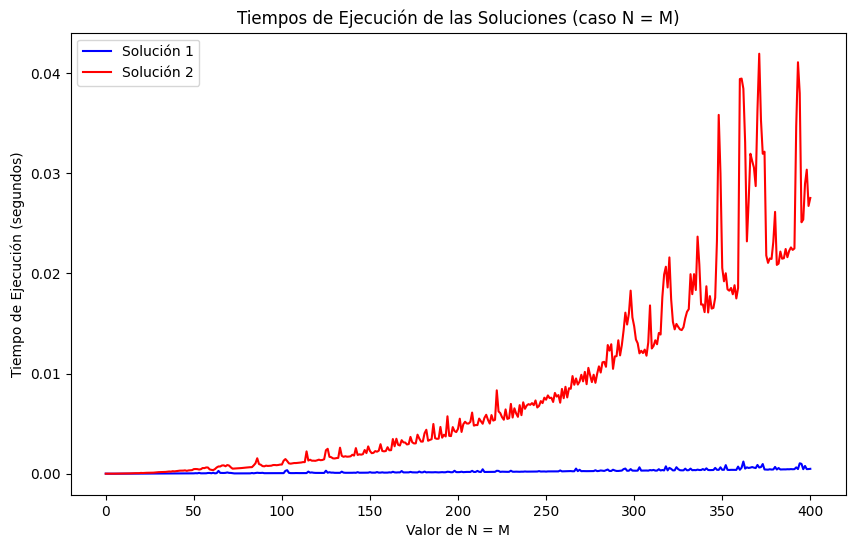

In [11]:
#Finalmente graficamos el tiempo de operación de cada solución
#Para esto vamos a suponer en primer lugar que N = M

# Creamos las listas donde almacenaremos los tiempos
tiempos_n_igual_m_sol1 = []
tiempos_n_igual_m_sol2 = []
Tamanho = range(0,401) #Rango de valores para ir cambiando los valores de N y/o M

# Recorremos valores de n y m, considerando que N = M
for n in Tamanho:
    pcb = PCB2(n, n)  # Instancia de la clase PCB2 con N = M = n
    
    # Llamamos a las soluciones y almacenamos los tiempos en las listas
    tiempo_sol1 = pcb.solucion_1_sinprint()  # El decorador captura el tiempo y lo imprime
    tiempo_sol2 = pcb.solucion_2_sinprint()
    
    # Agregamos los tiempos a las listas
    tiempos_n_igual_m_sol1.append(tiempo_sol1[1])  # El tiempo viene como segundo valor del decorador
    tiempos_n_igual_m_sol2.append(tiempo_sol2[1])

# Graficamos los tiempos
x = Tamanho

plt.figure(figsize=(10, 6))

plt.plot(x, tiempos_n_igual_m_sol1, label="Solución 1", color="blue")
plt.plot(x, tiempos_n_igual_m_sol2, label="Solución 2", color="red")

plt.title("Tiempos de Ejecución de las Soluciones (caso N = M)")
plt.xlabel("Valor de N = M")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.legend()
plt.show()


Aquí se puede observar que claramente la solución 2 posee un tiempo de ejecución mayor frente a números elevados de N = M. Esto puede deberse a que la solución 1 al tratarse una combinatoria es "cerrada" y no posee iteraciones, pues este caso  se cumple que comb(N+M, N)= comb(N+M,M)= 2N!/(N!)^2 y no se requiere de ninguna iteración en el método. 

En cambio, el método de la solución 2 va recorriendo las grillas de la PCB y rellenando los valores con los posibles caminos, lo que computacionalmente puede resultar más lento cuando se requiere iterar mucho más. En este caso como N=M, se tendrá que iterar cada vez mientras más grandes sean N (y M), pues se necesitan muchas grillas y operaciones para llegar a encontrar la cantidad de caminos de un punto (N,M). 

Por un lado, podemos notar con la gráfica que si no contamos el ruido, la recta roja (solución 2) crece cada vez más rápido y es una recta convexa, lo que muestra un comportamiento tipo O(n^2). Por otro lado, la recta azul (solución 1) es practicamente constante, lo que tiene sentido al no haber iteraciones implicadas, por lo que su complejidad es de O(1).

Cabe notar que a valores más grandes de N= M = 500, el código lanza error por overflow y no puede realizar el gráfico, esto sugiere que las operaciones de la solución 1 (combinatoria) son con números tan grandes que se producen errores en la división o factoriales. No obstante, se estima que si se pudiera arregalr este problema, entonces la solución 1 seguiría manteniendose constante y la solución 1 tardaría cada vez más (debido a la mayor cantidad de iteraciones). 

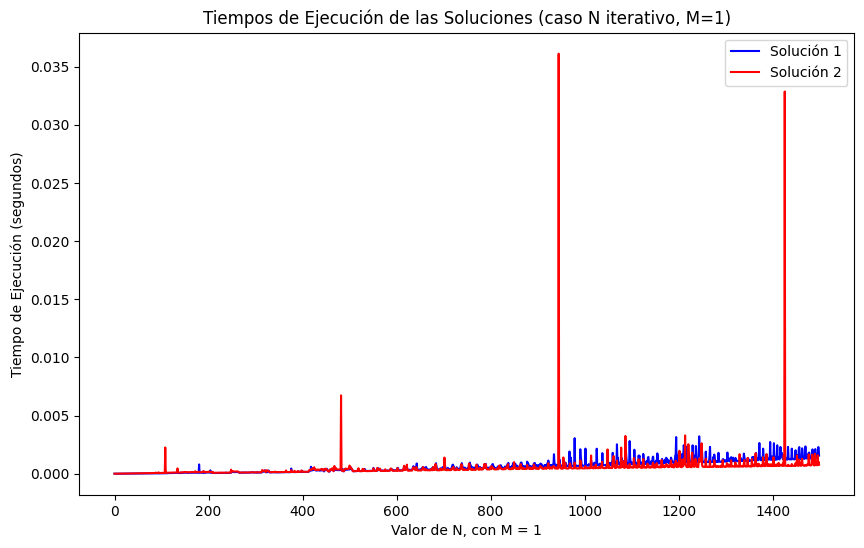

In [27]:
#Finalmente graficamos el tiempo de operación de cada solución
#Ahora vamos a calcular el caso en que M = 0 y N va a iterar.

# Creamos las listas donde almacenaremos los tiempos
tiempos_n_igual_m_sol1 = []
tiempos_n_igual_m_sol2 = []
Tamanho = range(0,1500) #Rango de valores para ir cambiando los valores de N y/o M, en este caso será más grande

#Se itera el valor de N (se recorre) y fijaremos el valor de M en 0.
for n in Tamanho:
    pcb = PCB2(n, 1)  # Instancia de la clase PCB2 con N = M = n
    
    # Llamamos a las soluciones y almacenamos los tiempos en las listas
    tiempo_sol1 = pcb.solucion_1_sinprint()  # El decorador captura el tiempo y lo imprime
    tiempo_sol2 = pcb.solucion_2_sinprint()
    
    # Agregamos los tiempos a las listas
    tiempos_n_igual_m_sol1.append(tiempo_sol1[1])  # El tiempo viene como segundo valor del decorador
    tiempos_n_igual_m_sol2.append(tiempo_sol2[1])

# Graficamos los tiempos
x = Tamanho

plt.figure(figsize=(10, 6))

plt.plot(x, tiempos_n_igual_m_sol1, label="Solución 1", color="blue")
plt.plot(x, tiempos_n_igual_m_sol2, label="Solución 2", color="red")

plt.title("Tiempos de Ejecución de las Soluciones (caso N iterativo, M=1)")
plt.xlabel("Valor de N, con M = 1")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.legend()
plt.show()


Para este caso donde se fija M = 1 y se van cambiando los valores N entre 0 y 1500, se puede observar que la solución 1 en general es más lenta que la solución 2. Esto puede suceder porque la solución combinatoria al llegar a valores más grandes de N (pero M = 1), se empieza a perder la precisión porque se realizan operaciones con números muy grandes (enormes factoriales). En cambio, la solución 2 sólo realiza una iteración que recorre N pasos lineales, lo que hace que sea más eficiente.